In [1]:
# In light of these requirements, we need to put together the 1D and 2D plotters for arbitrary x and y, as well
# as 1 and 2D error probability plots

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# %load ../../loaders/imports.py
import sys, os
import numpy as np
import matplotlib.pyplot as plt
import time
import pdb

# Add the uoicorr directory to the path
sys.path.append('../../../uoicorr_run')

# Add the root directory of this repository
sys.path.append('../..')

from postprocess_utils import *
import pandas as pd
import sqlalchemy

In [4]:
import h5py
from job_utils.idxpckl import Indexed_Pickle

In [5]:
lasso = Indexed_Pickle('/home/akumar/lasso_pp_df.h5')

In [7]:
lasso_df.shape

(12856320, 22)

In [8]:
lasso_df.to_pickle('lasso_df.dat')

In [6]:
# These guys are small enough to live in memory
lasso = pd.read_sql_table('pp_df', lasso_con)
mcp = pd.read_sql_table('pp_df', mcp_con)
scad = pd.read_sql_table('pp_df', scad_con)

uoi = pd.read_sql_table('pp_df', uoi_con)
en = pd.read_sql_table('pp_df', en_con)

In [12]:
from plotting_utils import *

In [10]:
import h5py

In [13]:
sparsity_corr_2D

<function plotting_utils.sparsity_corr_2D(axis, df, z, use_eig_bound=False)>

## FPR vs. FNR plots

In [24]:
kappa = np.unique(lasso['kappa'].values)
sparsity = np.unique(lasso['sparsity'].values)

In [27]:
# Blue
c1 = ['#4286f4', '#99bdf7', '#00aeff']
# Green
c2 = ['#3ab700', '#bae288', '#64821d']
# Red
c3 = ['#e50b0b', '#ef5f5f', '#70001d']
# Cyan
c4 = ['#1ec9be', '#d799ff', '#572677']
# Orange
c5 = ['#e38f12']

cols = [c1[0], c2[0], c3[0], c4[0], c5[0]]
markers = ['o', 's', '^']

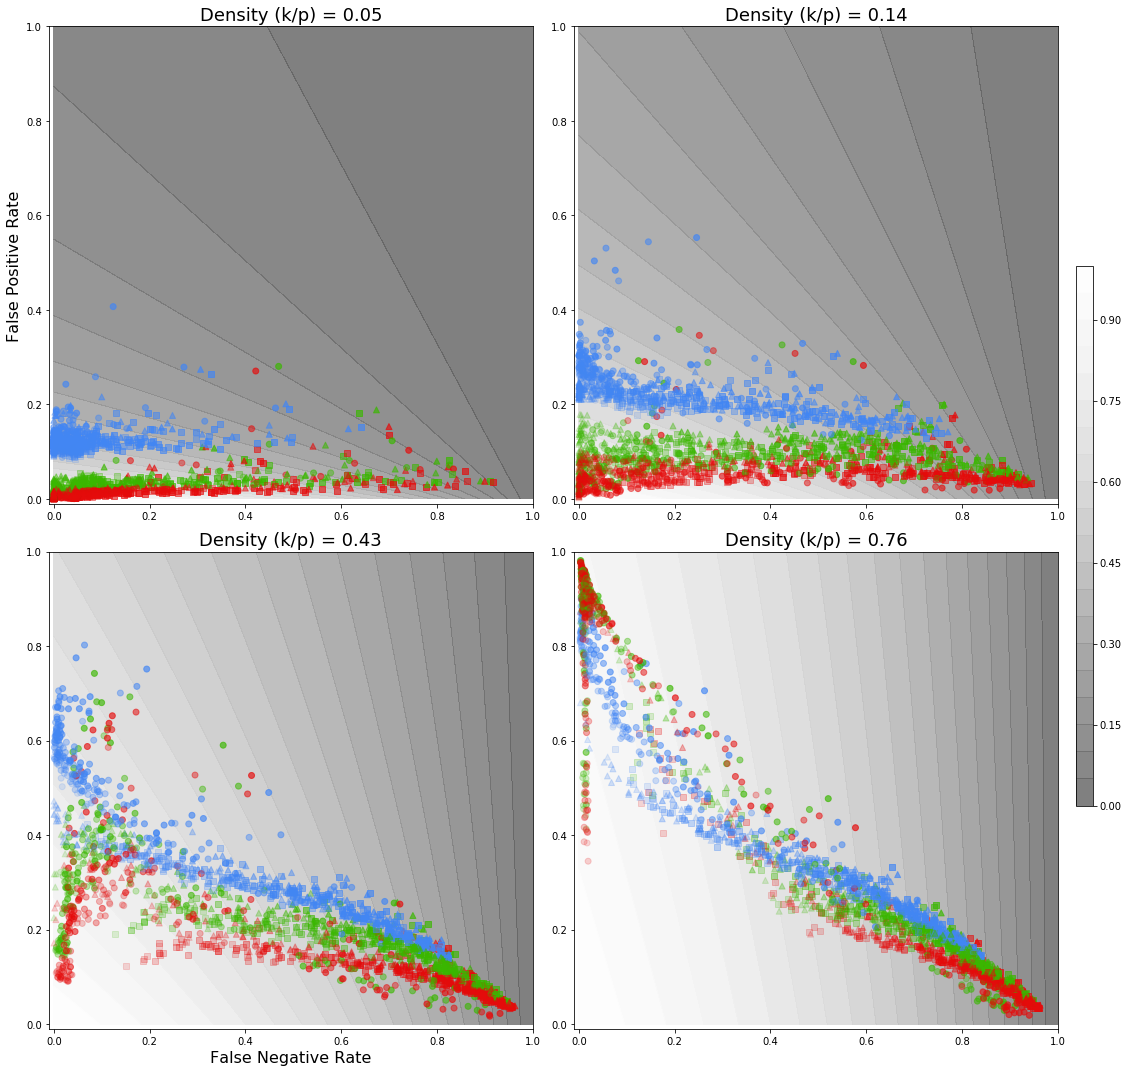

In [31]:
fig, ax = plt.subplots(2, 2, figsize = (15, 15))
scatters = []
n_features = 500
sparsity_ = [sparsity[3], sparsity[7], sparsity[11], sparsity[13]]
kappa_ = [5, 2, 1]
# Fix the number of samples!
np_ratio = 4
dframes = [lasso, mcp, scad]
selection_method = 'CV'

for i, s in enumerate(sparsity_):
    
    a = ax[np.unravel_index(i, (2, 2))]
    
    # Superimpose contours of constant selection accuracy
    xx = np.linspace(0, 1, 100)
    yy = np.linspace(0, 1, 100)
    z = np.zeros((100, 100))
    for ix, x in enumerate(xx):
        for iy, y in enumerate(yy):
            z[ix, iy] = 1 - ((1 - s)* y + s * x)/(s * (2 - x - y) + y) 
    
    cmap = plt.get_cmap('Greys_r')
    cmap_new = truncate_colormap(cmap, minval = 0.25)
    cs = a.contourf(xx, yy, z.T, 20, cmap = cmap_new, alpha = 0.75)

    # Set opacity via average correlation    
    for j, k in enumerate(kappa_):
        for ii, bw in enumerate([-1, np.inf, 0.1]):   
            for cidx, df in enumerate(dframes):
                fil_df = apply_df_filters(df, sparsity=s, selection_method = selection_method, 
                                                kappa = k, betawidth=bw, np_ratio=np_ratio)
                a, scat = FNR_FPR_scatter(a, fil_df, cols[cidx], marker = markers[ii])
        
    a.set_xlim([-0.01, 1])
    a.set_ylim([-0.01, 1])
    a.set_title('Density (k/p) = %.2f' % s, fontsize = 18)

ax[0, 0].set_ylabel('False Positive Rate', fontsize = 16)
ax[1, 0].set_xlabel('False Negative Rate', fontsize = 16)
cax = fig.add_axes([1, 0.25, 0.015, 0.5])
plt.colorbar(cs, cax = cax)
plt.tight_layout()
plt.savefig('fprvfnr_R2.pdf', bbox_inches = 'tight', pad_inches=0)

# Make a second version of the above plot with R^2. Also make the different betawidths different shaped points

In [ ]:
## ^ Interesting difference between betawidth -1 and the other ones

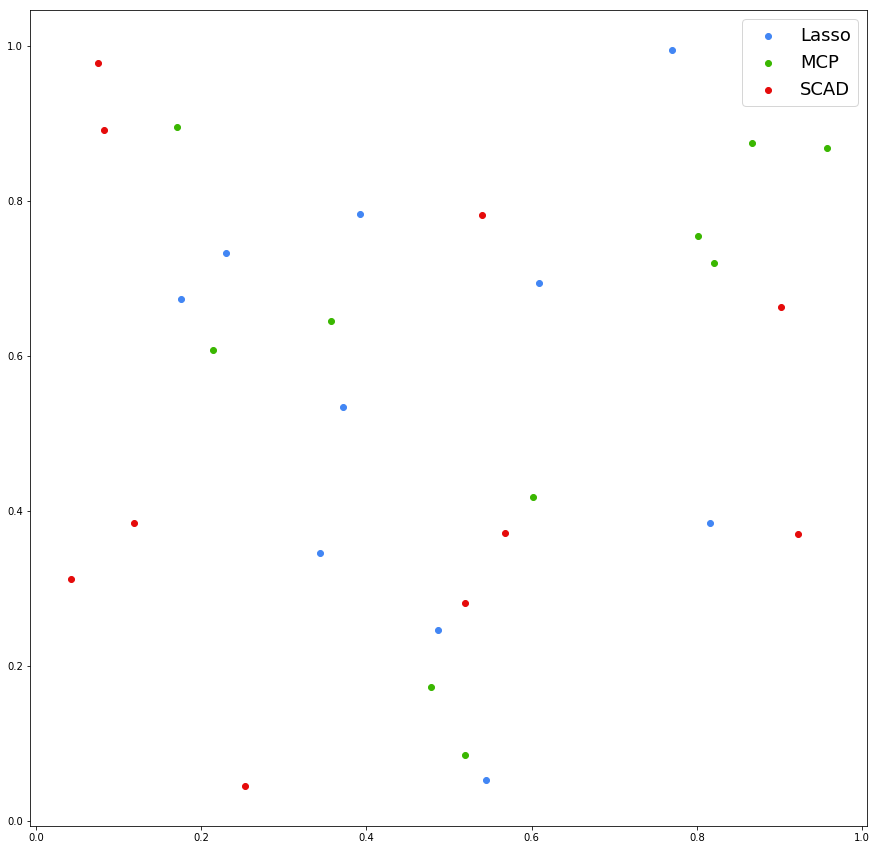

In [16]:
# Dummy plot to get a colormap
fig, ax = plt.subplots(figsize=(15, 15))
for cidx, df in enumerate(dframes):
    ax.scatter(np.random.random(10), np.random.random(10), c = cols[cidx])
plt.legend(['Lasso', 'MCP', 'SCAD'], fontsize=18)
plt.savefig('scatter_legend.pdf', bbox_inches='tight', pad_inches=0)

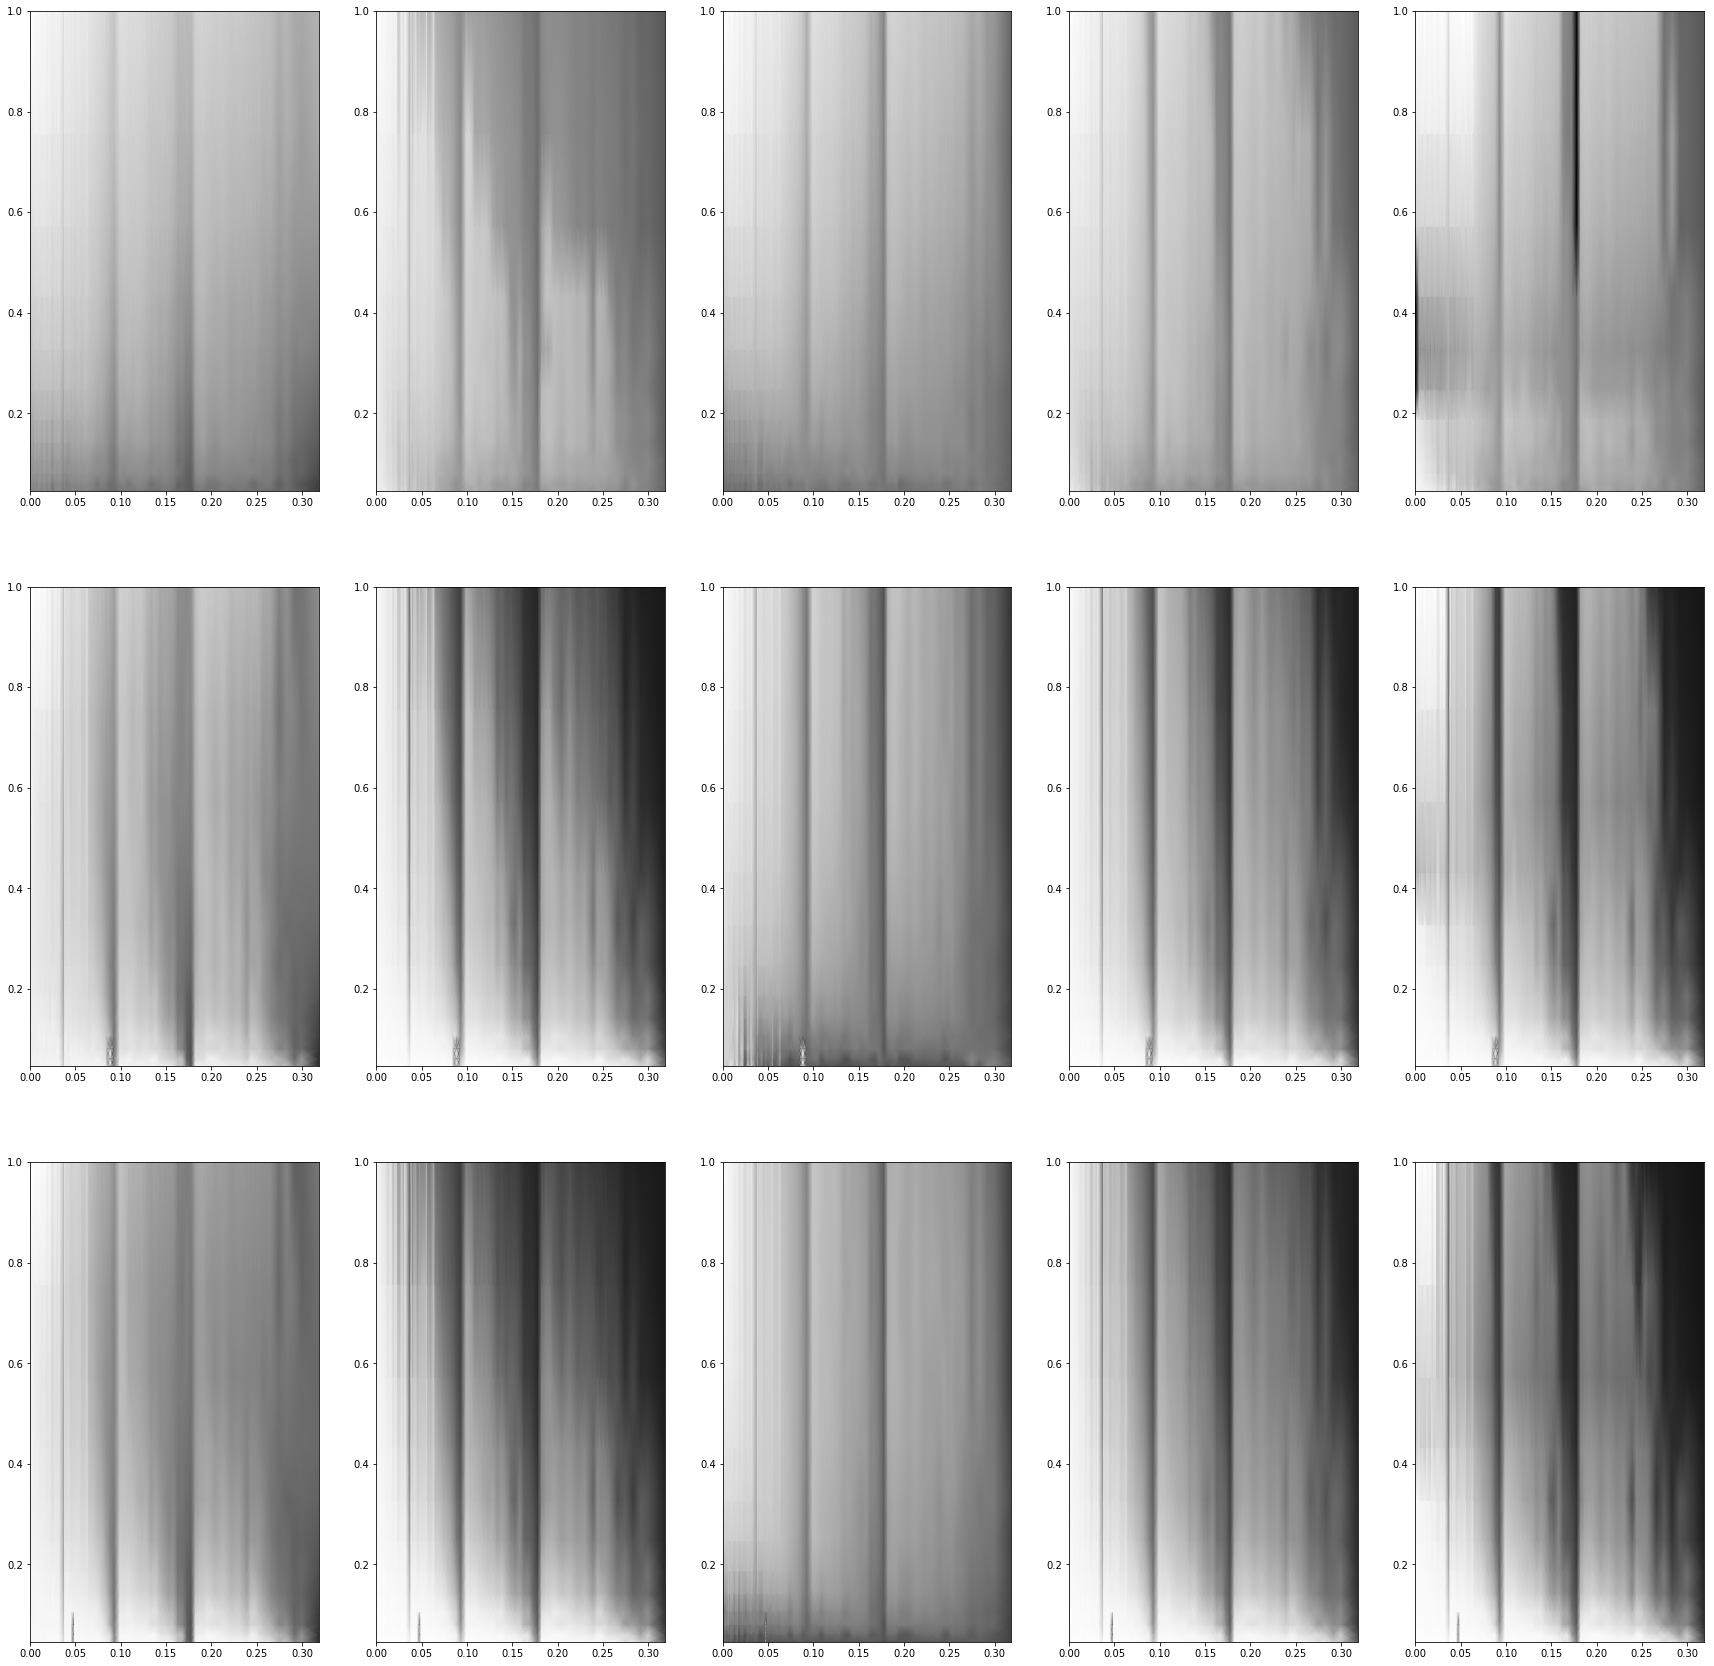

In [37]:
# 2D plots over sparsity vs. (average correlation, or can try spectral bounds) for SCAD, Lasso, UoI Lasso for the
# different model selction criteria

# Kind of a failure...

fig, ax = plt.subplots(3, 5, figsize = (30, 30))

dframes = [lasso, mcp, scad]
# Focus on a single n, SNR
kappa = 5
np_ratio = 4

selection_methods = ['CV', 'BIC', 'AIC', 'gMDL', 'empirical_bayes']

for i1, df in enumerate(dframes):
    for i2, sm in enumerate(selection_methods):
        df_ = apply_df_filters(df, selection_method=sm, kappa=kappa, np_ratio=np_ratio)
        sparsity_corr_2D(ax[i1, i2], df_, 'sa', False)

In [39]:
# List of cov_params 
cov_params, _ = group_dictionaries(df_[['correlation', 'block_size', 'L', 't']].to_dict('records'), None)

In [28]:
# Blue
c1 = ['#4286f4', '#99bdf7', '#00aeff']
# Green
c2 = ['#3ab700', '#bae288', '#64821d']
# Red
c3 = ['#e50b0b', '#ef5f5f', '#70001d']
# Cyan
c4 = ['#1ec9be', '#d799ff', '#572677']
# Orange
c5 = ['#e38f12']

cols = [c1[0], c2[0], c3[0], c4[0], c5[0], 'k']

In [26]:
# Linestyles
linestyles = ['solid', 'dashed', (0, (3, 1, 1, 1))] # densely dash dotted
# Marker styles
markers = ["o", "^", "s", "x", ">"]

selection_methods = ['BIC', 'AIC', 'CV', 'gMDL', 'empirical_bayes', 'oracle']

# Group information criteria together, CV as dashed, and adaptive as densley dash dotted
pltstyles = [('solid', "o"), ('solid', "^"), ('dashed', 's'), (linestyles[2], 'x'), (linestyles[2], ">")]


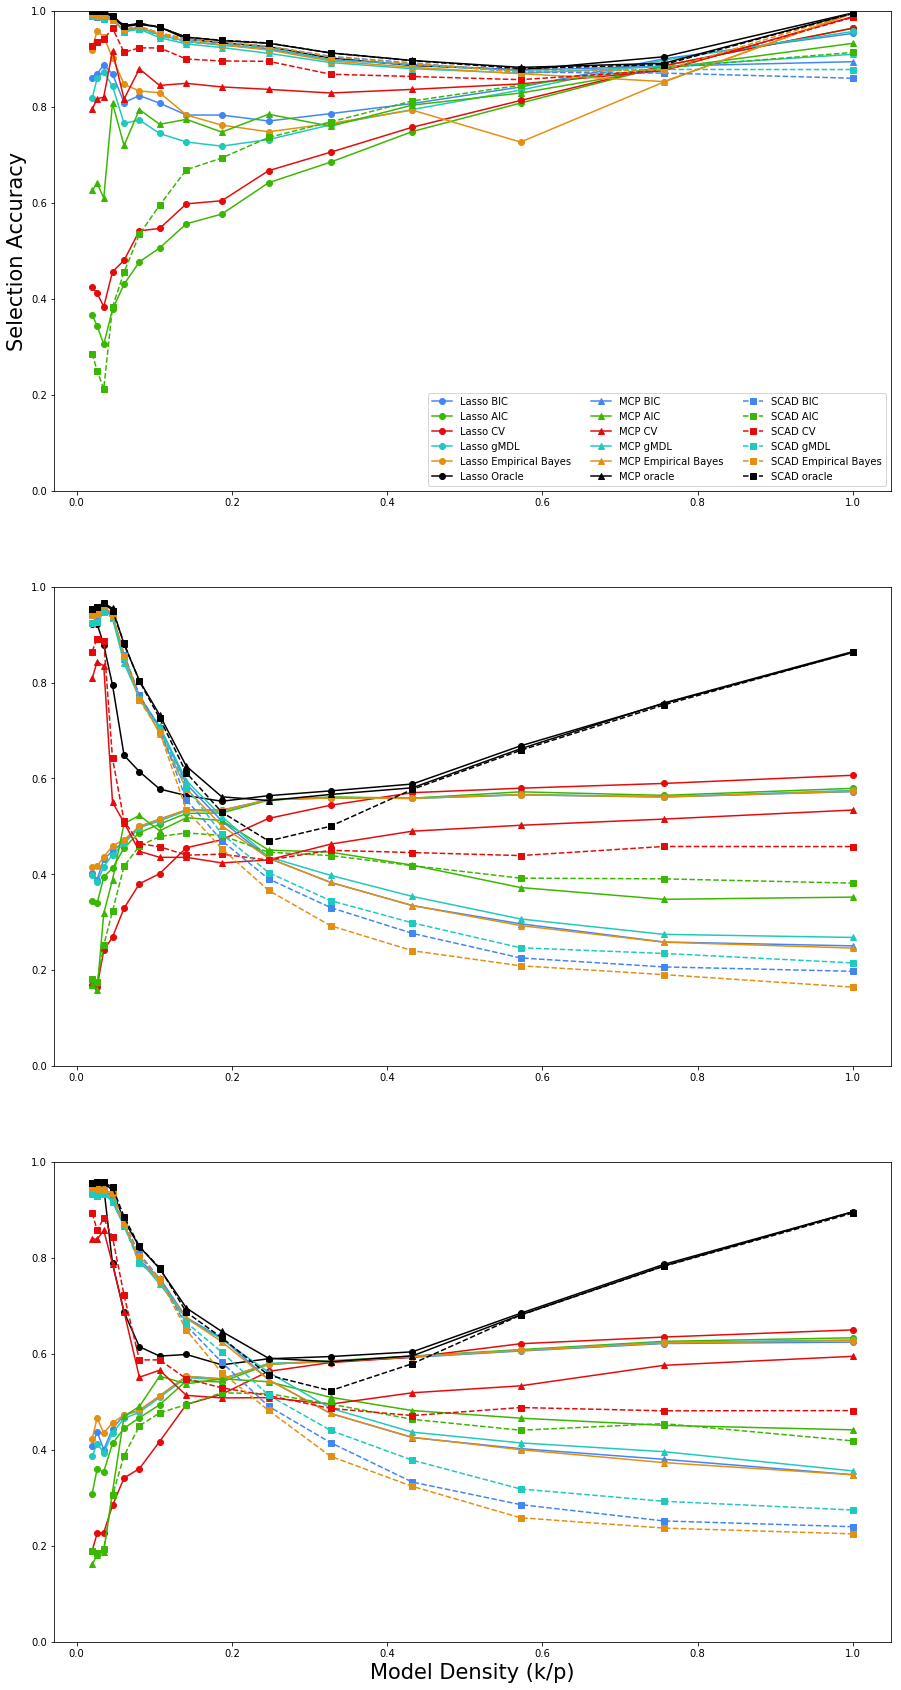

In [34]:
# For 3 different covariance matrices, plot selection accuracy vs sparsity for all algorithms and all selection methods
fig, ax = plt.subplots(3, 1, figsize = (15, 30))

# Manually selected cov_params
cov_params = [[0.15811388, 50.0, 1.0, 0.0], [0.0, 100.0, 100.0, 0.8897894862254017]]

# Fix the np_ratio, signal to noise, and betawidth
np_ratio = 16
kappa = 5
betawidth = np.inf

sparsity = np.unique(lasso['sparsity'].values)
dframes = [lasso, mcp, scad]

# Use the same colors for each algorithm, different line style/marker combinations for each selection method
colors = []

for i1 in range(len(cov_params)):
    
    a = ax[i1]
    
    for i2, df in enumerate(dframes):
        
        df_ = apply_df_filters(df, np_ratio = np_ratio, 
                               correlation = cov_params[i1][0],
                               block_size = cov_params[i1][1],
                               L = cov_params[i1][2],
                               t = cov_params[i1][3],
                               kappa = kappa,
                               betawidth=betawidth)


        for i3, sm in enumerate(selection_methods):
    
            df_sm = apply_df_filters(df_, selection_method = sm)

            # Now average over the remaining degrees of freedom
            s, yvals, yerr = marginalize(df_sm, 'sa', ['sparsity'])
            
            # Extract and order
            s = np.array([val for sublist in s for val in sublist])
            yvals = yvals[0]
            yerr = yerr[0]
                        
            sorder = np.argsort(s)
            s = s[sorder]
            yvals = yvals[sorder]
            yerr = yerr[sorder]
            a.plot(s, yvals, marker = pltstyles[i2][1], linestyle = pltstyles[i2][0], color=cols[i3])
            a.set_ylim([0, 1])
            
ax[0].set_ylabel('Selection Accuracy', fontsize = 21)
ax[2].set_xlabel('Model Density (k/p)', fontsize = 21)
ax[0].legend(['Lasso BIC', 'Lasso AIC', 'Lasso CV', 'Lasso gMDL', 'Lasso Empirical Bayes', 'Lasso Oracle',
              'MCP BIC', 'MCP AIC', 'MCP CV', 'MCP gMDL', 'MCP Empirical Bayes', 'MCP oracle',
              'SCAD BIC', 'SCAD AIC', 'SCAD CV', 'SCAD gMDL', 'SCAD Empirical Bayes', 'SCAD oracle'], 
              ncol = 3, loc='lower right')
# plt.savefig('selection_method_comparisons.pdf', bbox_inches='tight', pad_inches=0)

# Need to fix this guy LOL

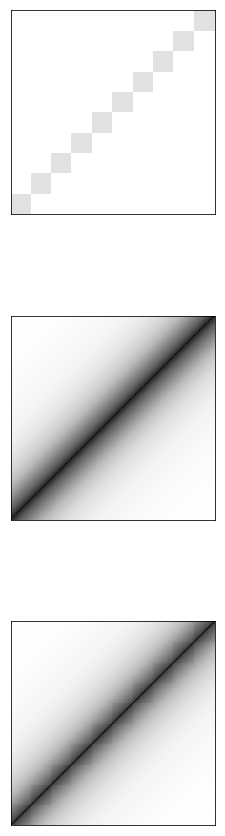

In [32]:
fig, ax = plt.subplots(3, 1, figsize = (7, 15))
cov_params = [[0.15811388, 50.0, 1.0, 0.0], [0.0, 100.0, 100.0, 0.8897894862254017], [0.15811388, 50.0, 100.0, 0.7972883364187614]]

for i in range(len(cov_params)): 
    
    block_size = int(cov_params[i][1])
    sigma = gen_covariance(500, cov_params[i][0], block_size, cov_params[i][2], cov_params[i][3]).T
    if i == 0:
        ax[i].pcolormesh(sigma.T, vmin = 0, vmax = 0.75, cmap = 'Greys')
    else:
        ax[i].pcolormesh(sigma.T, vmin = 0, vmax = 1, cmap = 'Greys')
    ax[i].set_aspect('equal')
    ax[i].set_xticks([])
    ax[i].set_yticks([])

plt.subplots_adjust(hspace = 0.5)
plt.savefig('cov_reference.pdf', bbox_inches='tight', pad_inches=0)